# Titanic Case Study

* This provides a case study of a Supervised Learning Data Analysis project.

# 1. The Data Analysis Problem
   
* Survival prediction data set on Titanic 
* The dataset is taken from Kaggle 
* The goal of this dataset is to predict whether a given passenger survived the sinking, based on various features such as their age, gender, ticket class, and more.
* We will analyse the dataset using supervised classification task (Logistic regression, Decision Tree)

Variable | Description
----------|--------------
PassengerId | Unique identifier for each passenger
Survived | A binary variable indicating whether the passenger survived or not. 0 = No, 1 = Yes
Pclass | The class of the ticket the passenger purchased. 1 = 1st, 2 = 2nd, 3 = 3rd
Name | The name of the passenger
Sex | The gender of the passenger
Age | The age of the passenger
SibSp | The number of siblings/spouses the passenger had aboard the ship
Parch | The number of parents/children the passenger had aboard the ship
Ticket | The ticket number
Fare | The fare paid for the ticket
Cabin | The cabin number
Embarked | The port of embarkation for the passenger. C = Cherbourg, Q = Queenstown, S = Southampton

## 2. Exploring Data
### 2.1 Import the necessary modules and read the data

In [1]:
import pandas as pd 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [2]:
df = pd.read_csv("titanic.csv") # loading data into dataFrame

### 2.2 Exploring size of data and variable types

In [3]:
df.columns # Listing dataframe columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.dtypes # returns the datatype of each column 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.shape # returns the shape of data : 891 rows and 12 columns

(891, 12)

**Observations:**
1. 11 feature variables and one target variable (Survived)
2. PassengerID : Primary key that is unique, thus of no use.
3. Continuous Data : Age, Fare
4. String Columns : 5
5. Numerical Columns : 5
6. String Data : Cabin, Name, Ticket
7. Categorical String Data : Sex, Embarked
8. Categorical Data : Sibsp, Pclass, Parch, Embarked

### 2.3 Preliminary exploration of values in the data

In [6]:
df.head()# view of the first few rows of the dataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe() # description of the numerical values in the data set (does not show categorical variables)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Continuous variables:**
Age and fare are considered continuous data in the Titanic dataset because they can take on a range of numerical values within a certain interval.

In [8]:
df.info() # This pandas function returns the data types associated with each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.shape

(891, 12)

### 2.4 Missing Data

Percentage of Missing Data

In [10]:
100 * df.isna().sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

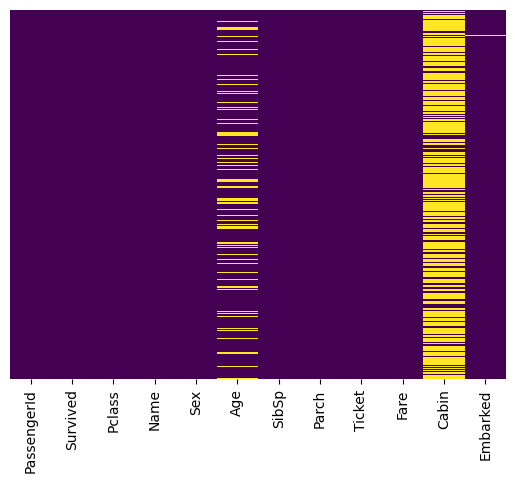

In [11]:
# Heatmap to show visually missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Insights:**
1. Age and Cabin columns have the most missing values.
2. Embarked column also has a few missing values

### 2.5 Distributions of continuous variable (Age)

<Axes: xlabel='Age', ylabel='Density'>

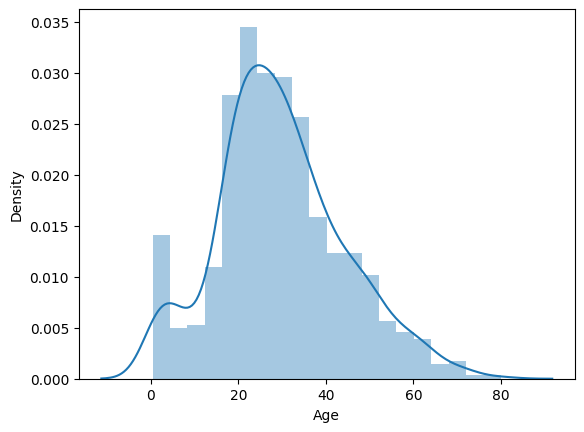

In [12]:
sns.distplot(df['Age'])

**Observations:**
1. Age has good distribution (normal distribution)
2. Majority age: 20 between 40
3. Peak : 20-30 yrs
4. Includes very young (less than 1 year) and some elderly passengers (over 60 years), but they are rare
5. Slight Dip around 5-15 years old indicating fewer children in this age range

### 2.6 Data Visualisation

In [13]:
#Function to create bar plot between categorical variable (x) and their survival
def plot_val(x):
    # Create a bar plot showing the relationship between x and survival
    sns.catplot(x=x, y='Survived', data=df, kind='bar', ci=None, palette='Paired')
    plt.title(f'{x} vs Survival')
    plt.show()

    # Calculate and print the mean survival rate for each category of x
    mean_survival = df.groupby(x)['Survived'].mean().reset_index()
    print(mean_survival)

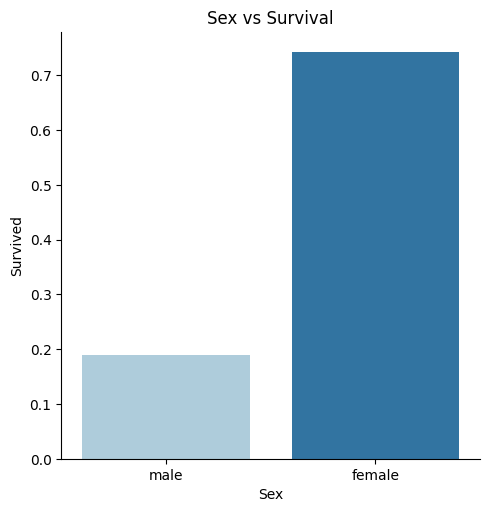

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [14]:
plot_val('Sex')

**Observations:**
1. Female survival rate is ~75% and Men's survival rate is ~19%.
2. Female has higher chance of survival than male

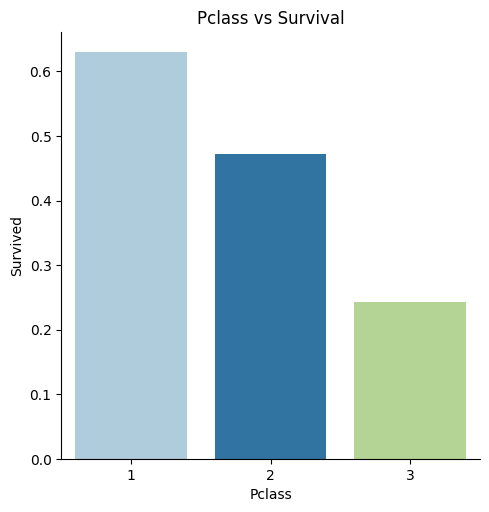

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [15]:
plot_val('Pclass')

**Observations:**
1. Pclass 1 survival rate: 63%
2. Pclass 2 survival rate: 47%
3. Pclass 3 survival rate: 24%
4. Pclass 1 has the highest survival rate; Pclass3 has the lowest Survival rate.

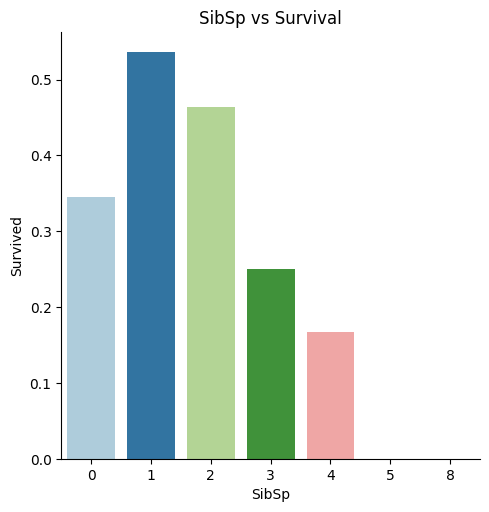

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [16]:
plot_val('SibSp')

**Observations:**
1. SibSp 1 has highest chance of survival (53%) , followed by SibSp 2 (46%)
2. SibSp 5 and 8 has 0 chances of survival

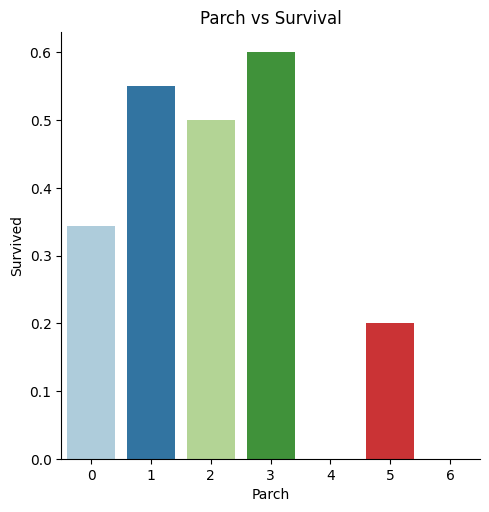

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


In [17]:
plot_val('Parch')

**Observations:**
1. Parch 3 has highest survival rate (60%), followed by Parch 1 (55%) and Parch 2 (50%)
2. Parch 4 and Parch 6 has 0% chances of survival

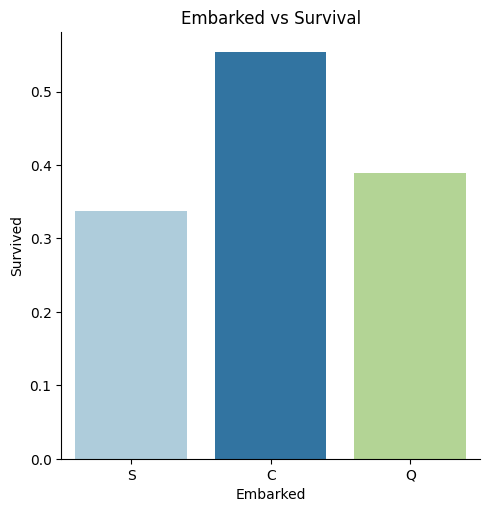

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [18]:
plot_val('Embarked')

**Obserbvations**
1. Embarked C has highest chance of survival 55% among others
2. Embarked Q chance of survival: 38% 
3. Emarked S chance of survival: 33% (lowest among others)

### 2.6 Data Addition (for better Visualization)

**For better Data Analysis, we are adding feature**
    1) Title
    2) Family

### 2.6.1 Title:

In [19]:
#Extracting Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

**Observations:**
    Dataset contains many different titles, so it may be helpful to group similar titles together into categories.

In [20]:
#Matching relevant Titles
df.loc[df.Title.eq('Mrs'), 'Title'] = 'Mrs'
df.loc[df.Title.eq('Mr'), 'Title'] = 'Mr'
df.loc[df.Title.isin(['Miss','Ms']),'Title'] = 'Miss'
df.loc[df.Title.eq('Master'),'Title'] = 'Master'

df.loc[~df.Title.isin(['Mrs','Mr','Miss','Master']),'Title'] = 'Other'


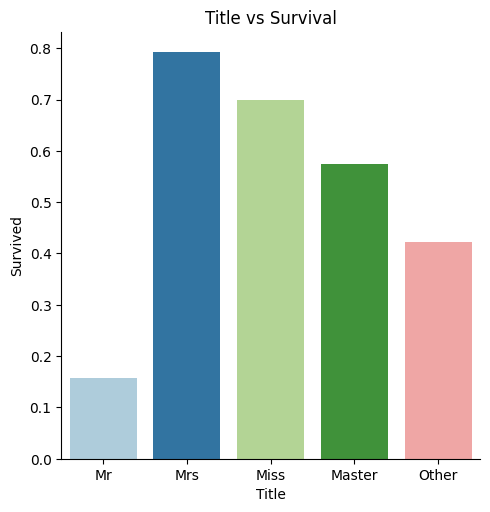

    Title  Survived
0  Master  0.575000
1    Miss  0.699454
2      Mr  0.156673
3     Mrs  0.792000
4   Other  0.423077


In [21]:
plot_val('Title')

**Observations:** 
1. Mrs. has the highest chance of survival, followed by Miss
2. Mr. has lowest chance of survival (15.66%)


### 2.6.2 Family:

In [22]:
#Family includes siblings/spouses + parents/children and 1 including themselves
df['Family']= df['SibSp'] + df['Parch']+1

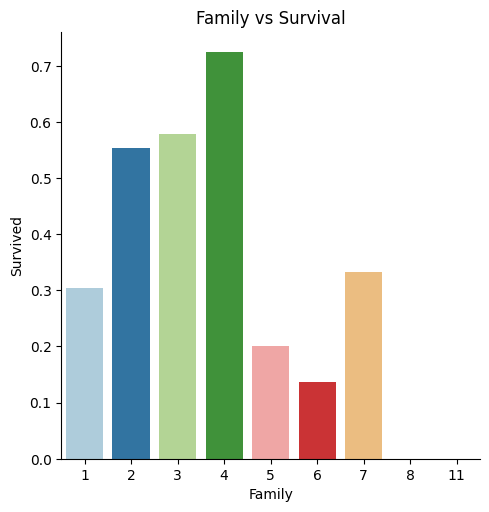

   Family  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000


In [23]:
plot_val('Family')

**Observations:** 
1. Family size 8 and 11 have 0% chance of survival
2. Family size 4 has maximum chance of survival (72%) followed by family size 3 (57%)
3. Family size 6,5, 1 and 7 also has very chances of survival. 

## 3. Data Preprocessing

### 3.1 Convert categorical variables to integer ones

In [24]:
#Converting male to 0 and female to 1
df.Sex = df.Sex.map({"male":0,"female":1})

### 3.1 Convert categorical variables to integer ones

In [25]:
df.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [26]:
df.Age = df.Age.fillna(df.Age.mean())
df.Age[0:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

**Observations:**
1. We see 5th Value previously NaN is changed to the column's mean value using fillna function

## 4. Feature Selection

### 4.1 Look at correlations between each pair of variables using Pandas

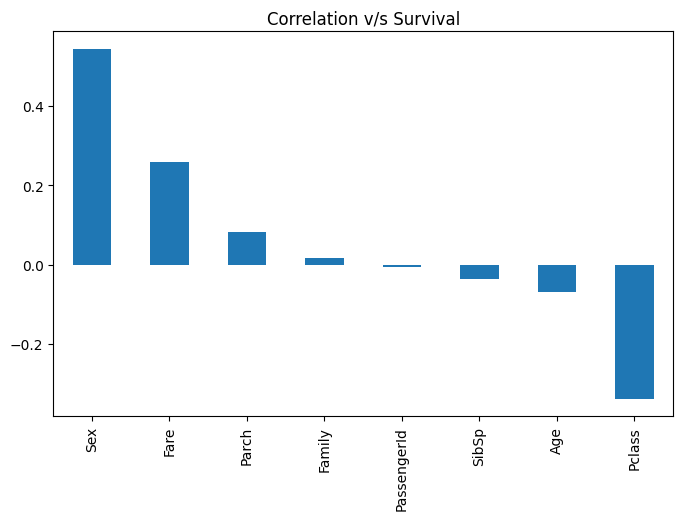

In [27]:
#Correlation v/s Survival in bar chart
corr=df.corr()['Survived'].sort_values(ascending=False)# gives us the correlation values
plt.figure(figsize=(15,6))
corr[1:].plot(kind='bar', figsize=(8,5), title='Correlation v/s Survival')
plt.show()

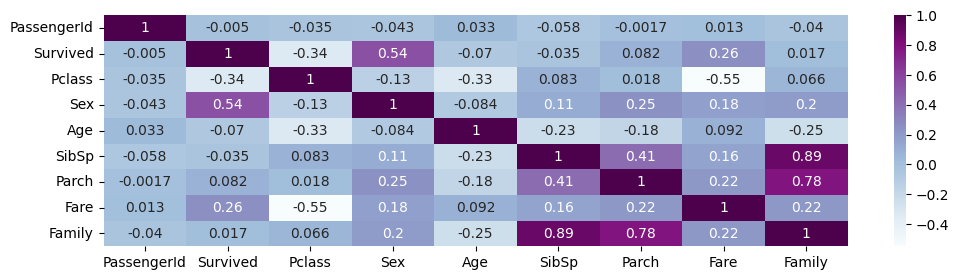

In [28]:
#Heatmap of correlation matrix
corr=df.corr()
plt.figure(figsize=(12,3))
sns.heatmap(corr, annot = True, cmap="BuPu")
plt.show()

**Observations:** 
1. Pclass and Fare are highly corerelated with Survival.
2. Age and Parch lightly corerelated with Survival.
3. Family and Sibsp also plays a role in Survival.
3. PassengerId plays no role

### 4.2 Dropping unnecessary data

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family'],
      dtype='object')

**Dropping columns:** PassengerId, Name, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Family as we no longer need it.

In [30]:
#drop function
df.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked","Title","Family"], axis="columns",inplace=True)
df.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [31]:
X = df.drop(["Survived"], axis="columns")
Y = df.Survived
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## 5. Prediction and Evaluation

In [32]:
#Using Sklearn we will divide our dataset into training (80%) and testing (20%)
train_test_split(X,Y,train_size = 0.8) # automaticaly sets 0.2 for testing

[     Pclass  Sex        Age
 593       3    1  29.699118
 285       3    0  33.000000
 80        3    0  22.000000
 830       3    1  15.000000
 343       2    0  25.000000
 ..      ...  ...        ...
 482       3    0  50.000000
 682       3    0  20.000000
 408       3    0  21.000000
 133       2    1  29.000000
 52        1    1  49.000000
 
 [712 rows x 3 columns],
      Pclass  Sex        Age
 403       3    0  28.000000
 668       3    0  43.000000
 734       2    0  23.000000
 452       1    0  30.000000
 231       3    0  29.000000
 ..      ...  ...        ...
 26        3    0  29.699118
 527       1    0  29.699118
 772       2    1  57.000000
 841       2    0  16.000000
 121       3    0  29.699118
 
 [179 rows x 3 columns],
 593    0
 285    0
 80     0
 830    1
 343    0
       ..
 482    0
 682    0
 408    0
 133    1
 52     1
 Name: Survived, Length: 712, dtype: int64,
 403    0
 668    0
 734    0
 452    0
 231    0
       ..
 26     0
 527    0
 772    0
 841  

In [33]:
# creating variables to place parameter
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)

## 6. Data Analysis
We will use Decision Tree and Logistic Regression methods.


### 6.1 Decision Trees  

In [34]:
#max depth specifies levels of tree
dt_Model = tree.DecisionTreeClassifier(max_depth=3)
dt_Model

DecisionTreeClassifier(max_depth=3)

In [35]:
#fit method to adjust data for model training
dt_Model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
#predict method for model testing
dt_Model.predict(X_test) #always gets x and retuns y

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0])

In [37]:
Y_pred_dt = dt_Model.predict(X_test)
Y_pred_dt

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0])

In [38]:
#Dataframe to show real and predicted values of y 
res = pd.DataFrame({"Survided REAL": Y_real, "Survived PREDICTION": Y_pred_dt})
res

,Survided REAL,Survived PREDICTION
649,1,1
403,0,0
700,1,1
526,1,1
80,0,0
...,...,...
272,1,1
667,0,0
334,1,1
73,0,0


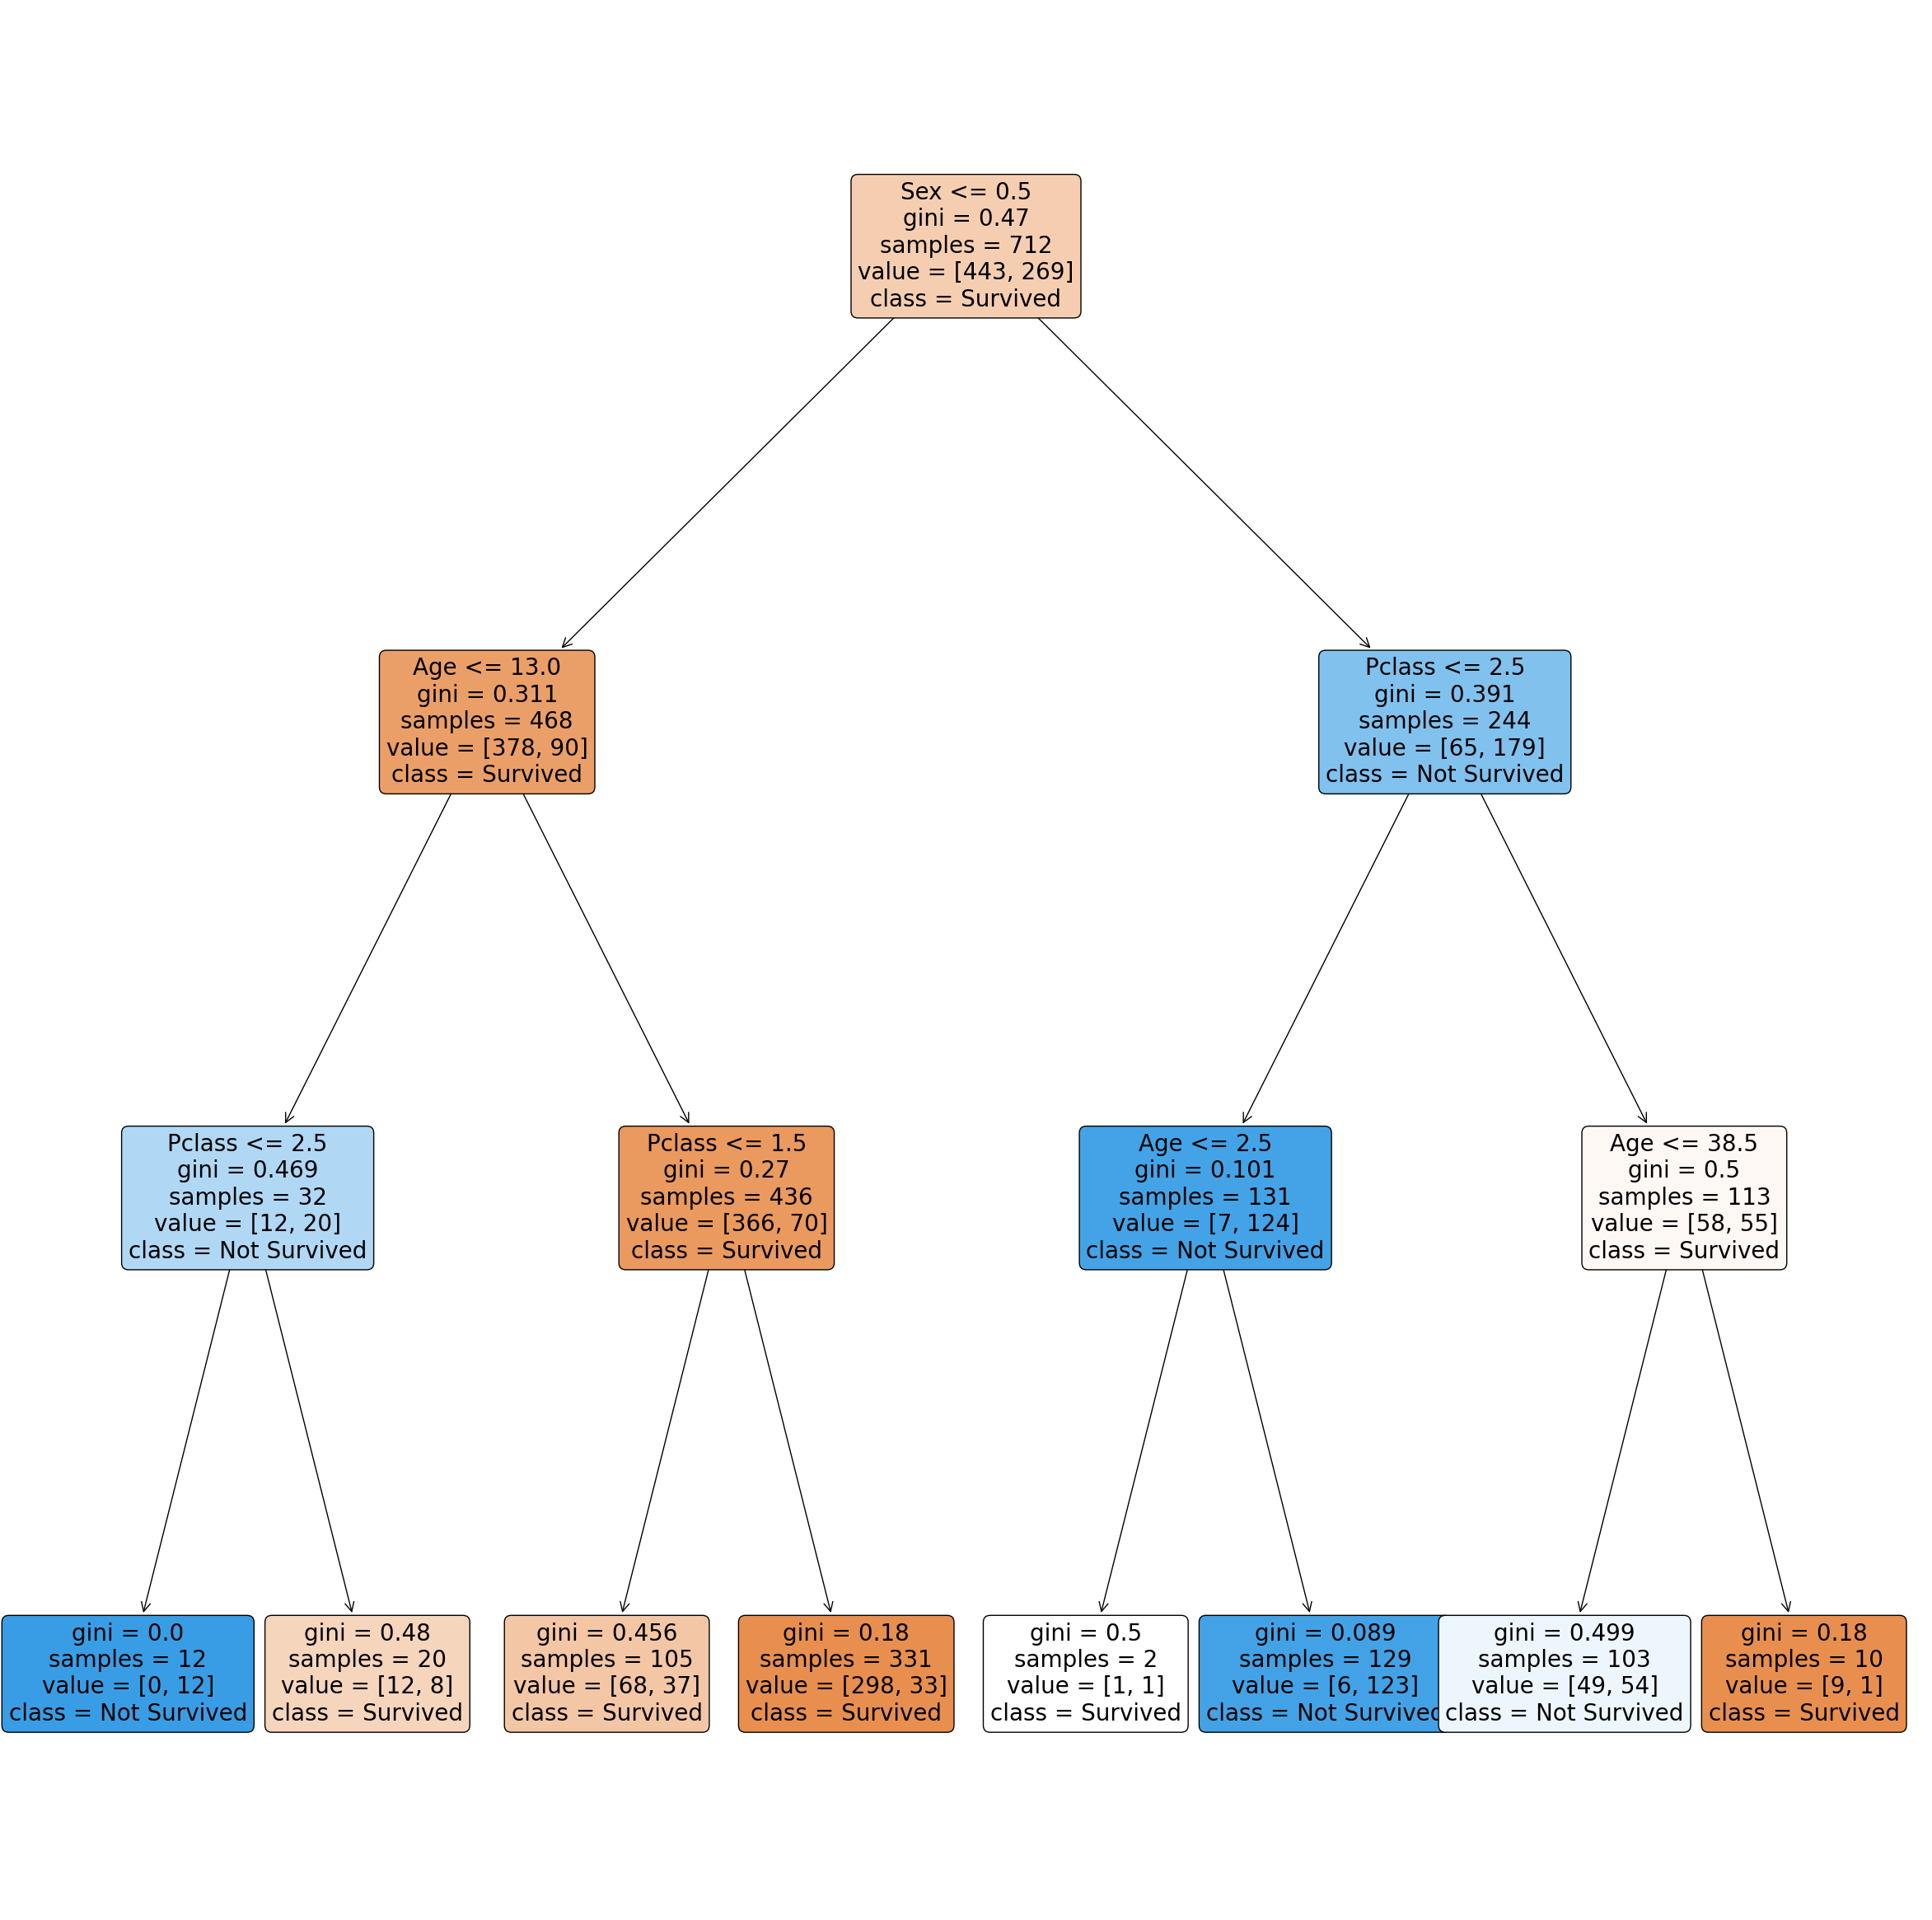

In [39]:
# Plotting tree
plt.figure(figsize=(30,30))
graph_tree = plot_tree (dt_Model,feature_names = ['Pclass','Sex','Age'],
 class_names = ['Survived','Not Survived'],
 filled=True,rounded=True,fontsize = 20)

 ## Decision Tree - Performance Measurement

#### a) Accuracy

In [40]:
acc_dt = dt_Model.score(X_test,Y_real)  
acc_dt

0.8156424581005587

#### b) Precision

In [41]:
prec_dt = metrics.precision_score(Y_real,Y_pred_dt)  
prec_dt

0.7941176470588235

#### c) Recall

In [42]:
# Recall = true positive / true positive + false negative
r_dt = metrics.recall_score(Y_real,Y_pred_dt)  
r_dt

0.7397260273972602

#### d) Confusion matrix

In [43]:
conf_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
conf_dt

array([[92, 14],
       [19, 54]])

<Axes: >

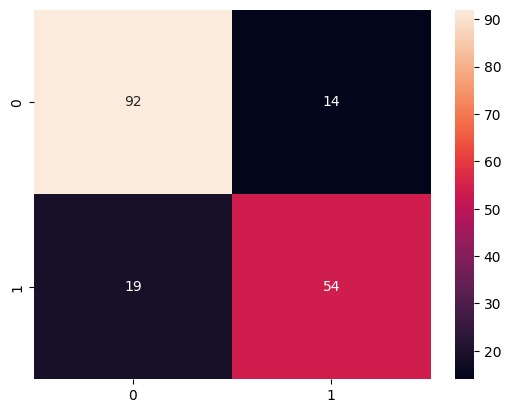

In [44]:
# 0,0: True Negative
# 0,1: False Positive 
# 1,0: False Negative 
# 1,1: True Positive 
sns.heatmap(conf_dt, annot=True)

#### e) AUC - ROC Curve

In [45]:
auc_dt = metrics.roc_auc_score(Y_real, Y_pred_dt)
auc_dt

0.8038252778495735

# PART 2.2. Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr_model = LogisticRegression(solver='liblinear')

In [48]:
#fit method to adjust data for model training
lr_model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [49]:
# predict method for model testing
y_pred_lg = lr_model.predict(X_test)
y_pred_lg

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0])

 ## Logistic Regression - Performance Measurement

#### a) Accuracy

In [50]:
# Acc = true negatives + true positives / true positives + false positives + true negatives + false negatives
acc_lg = lr_model.score(X_test,Y_real) 
acc_lg 

0.8100558659217877

#### b) Precision

In [51]:
# Prec = true positive / true positive + false positive
prec_lg = metrics.precision_score(Y_real,y_pred_lg)  
prec_lg

0.782608695652174

#### c) Recall

In [52]:
# Recall = true positive / true positive + false negative
r_lg = metrics.recall_score(Y_real, y_pred_lg)
r_lg

0.7397260273972602

#### d) Confusion matrix

In [53]:
con_lg = metrics.confusion_matrix(Y_real,y_pred_lg)
con_lg

array([[91, 15],
       [19, 54]])

<Axes: >

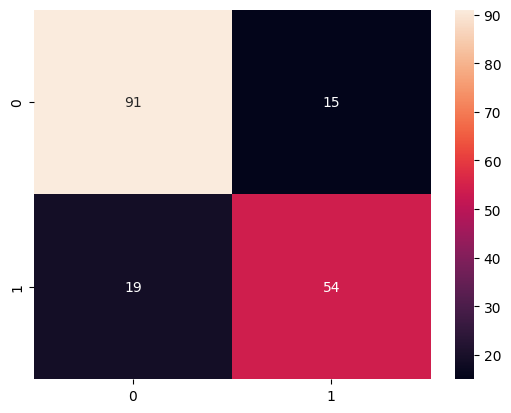

In [54]:
sns.heatmap(con_lg, annot=True)

#### e) AUC - ROC Curve

In [55]:
auc_lg = metrics.roc_auc_score(Y_real, y_pred_lg) # as the documentation explain, the main parameters are: y_true and y_score
auc_lg

0.7991082967174981

# PART 3 - Valuation Analysis 

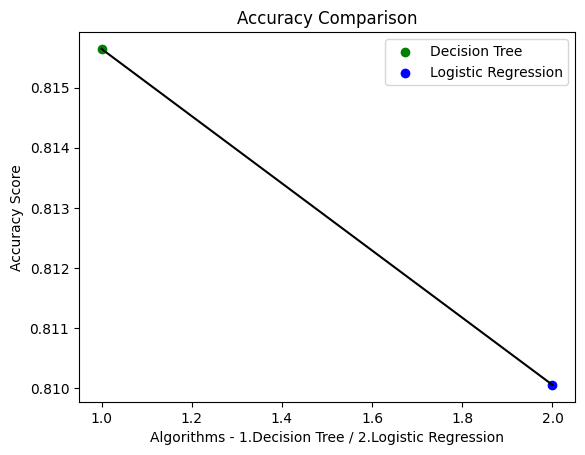

In [56]:
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy Score")

plt.xlabel("Algorithms - 1.Decision Tree / 2.Logistic Regression")

k = [acc_dt, acc_lg]

plt.plot([1,2],k, color = "black")

plt.scatter(1,acc_dt, marker="o", color="green", label="Decision Tree")

plt.scatter(2,acc_lg, marker="o", color="blue", label="Logistic Regression")


 
plt.legend()
plt.show()
